In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('Voice-Dataset.csv')

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label']= label_encoder.fit_transform(data['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()

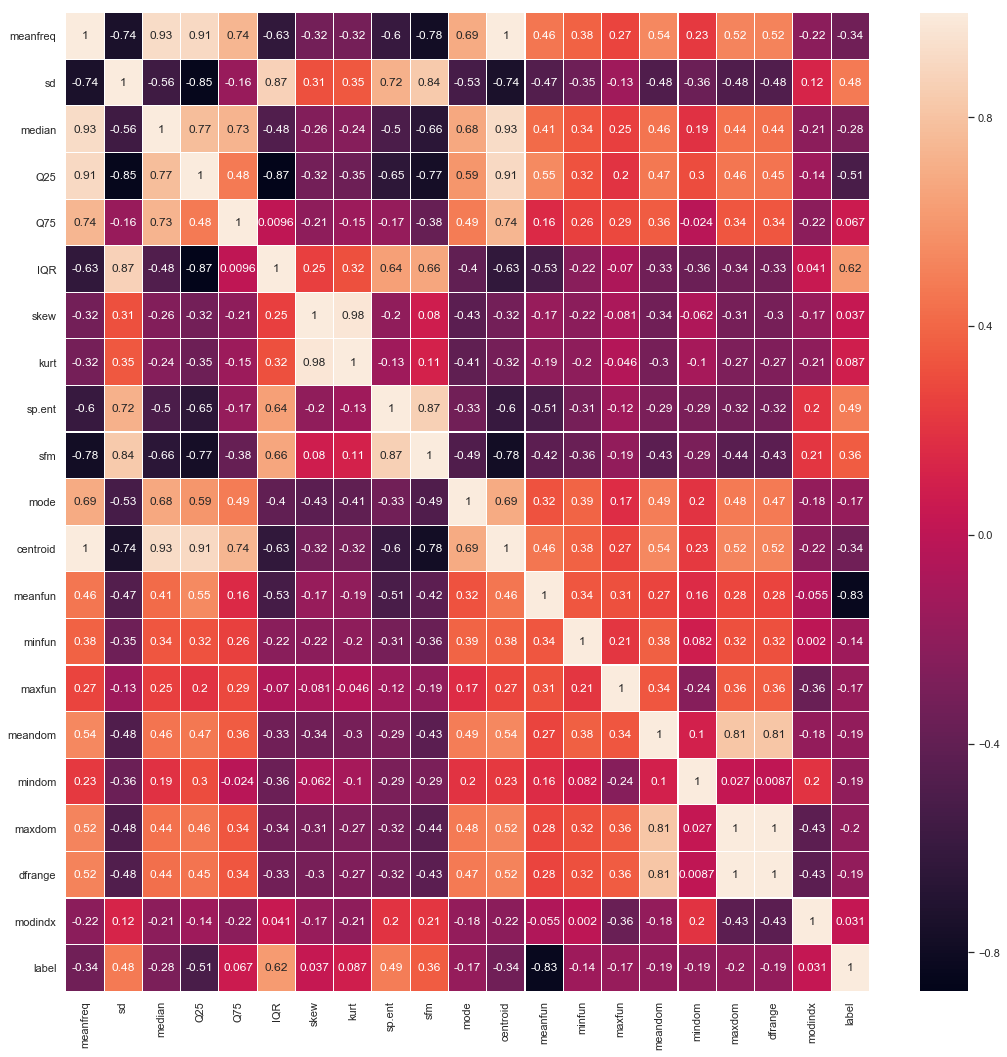

In [7]:
plt.figure(figsize=(18,18))

sns.heatmap(data.corr(), linewidths=0.1, linecolor='white', annot=True)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logistic_model = LogisticRegression()

In [9]:
training_data = data[['meanfreq','sd','Q25','IQR','sp.ent','meanfun']]

In [10]:
output_data = data['label']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X, x_test, Y, y_test = train_test_split(training_data,output_data, test_size=0.2,random_state=42)

In [17]:
logistic_model.fit(X, Y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
training_prediction = logistic_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
confusion = confusion_matrix(training_prediction, y_test)
confusion


array([[260,   9],
       [ 37, 328]], dtype=int64)

In [21]:
training_accuracy = accuracy_score(training_prediction, y_test)

In [22]:
training_accuracy

0.9274447949526814